### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 8
### Due: Friday, Oct 27 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw8_data.npy`, which is a (3 x 20) numpy array. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e., just the likelihood x prior) on a grid of the linear coefficient (i.e., the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [203]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

# compute the data likelihood given a model
def L(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = polynomial_fit(theta, x)
    res = scipy.stats.norm.pdf(y, loc=y_fit, scale=sigma_y)
    return np.product(res)

3) Using your 1D gridded likelihood x prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this 1D posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model parameter dimension.

5) Using your 2D gridded likelihood x prior, compute the Bayesian evidence of the quadratic model. 

In [204]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import display, Latex

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from scipy import integrate
import pandas as pd 

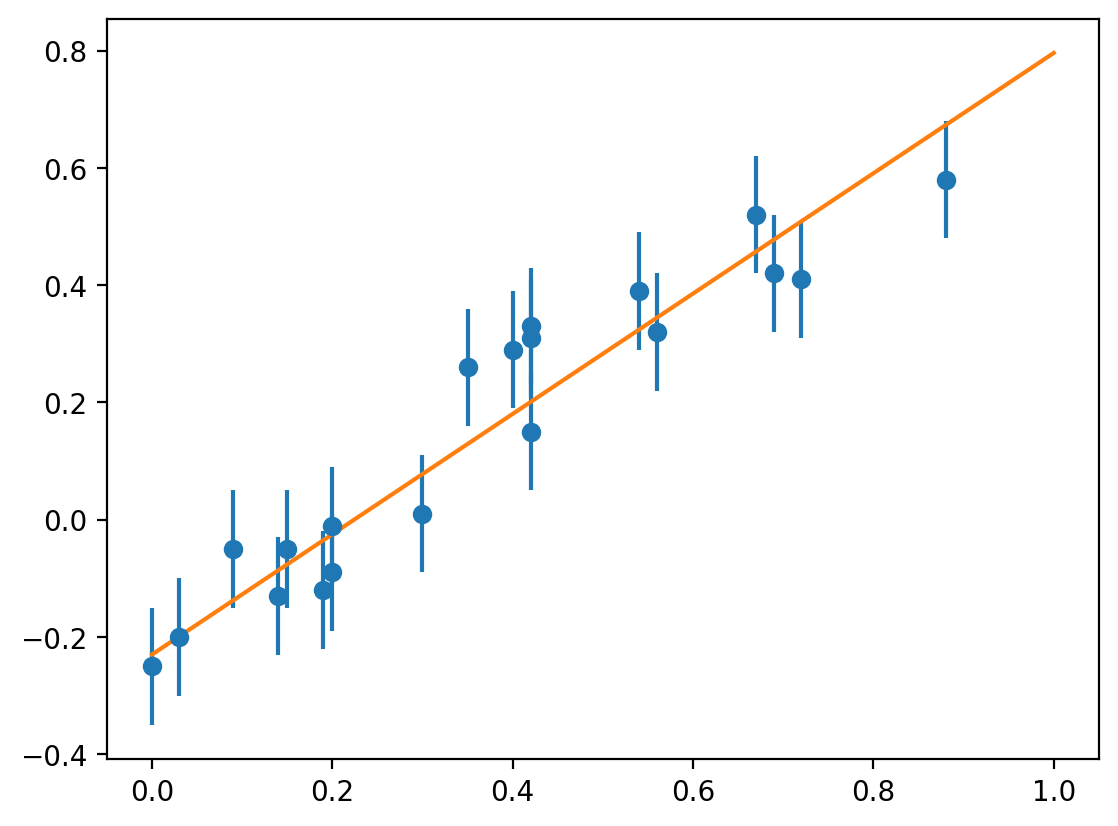

In [242]:
#1

data = np.load('../../homeworks/hw_data/hw8_data.npy')
x, y, sigma_y = data

xgrid = np.linspace(0,1,100)
plt.errorbar(x, y, yerr=sigma_y, fmt='o')
plt.plot(xgrid, th0 + xgrid * th1_arr[maxidx])

1.0260260260260257

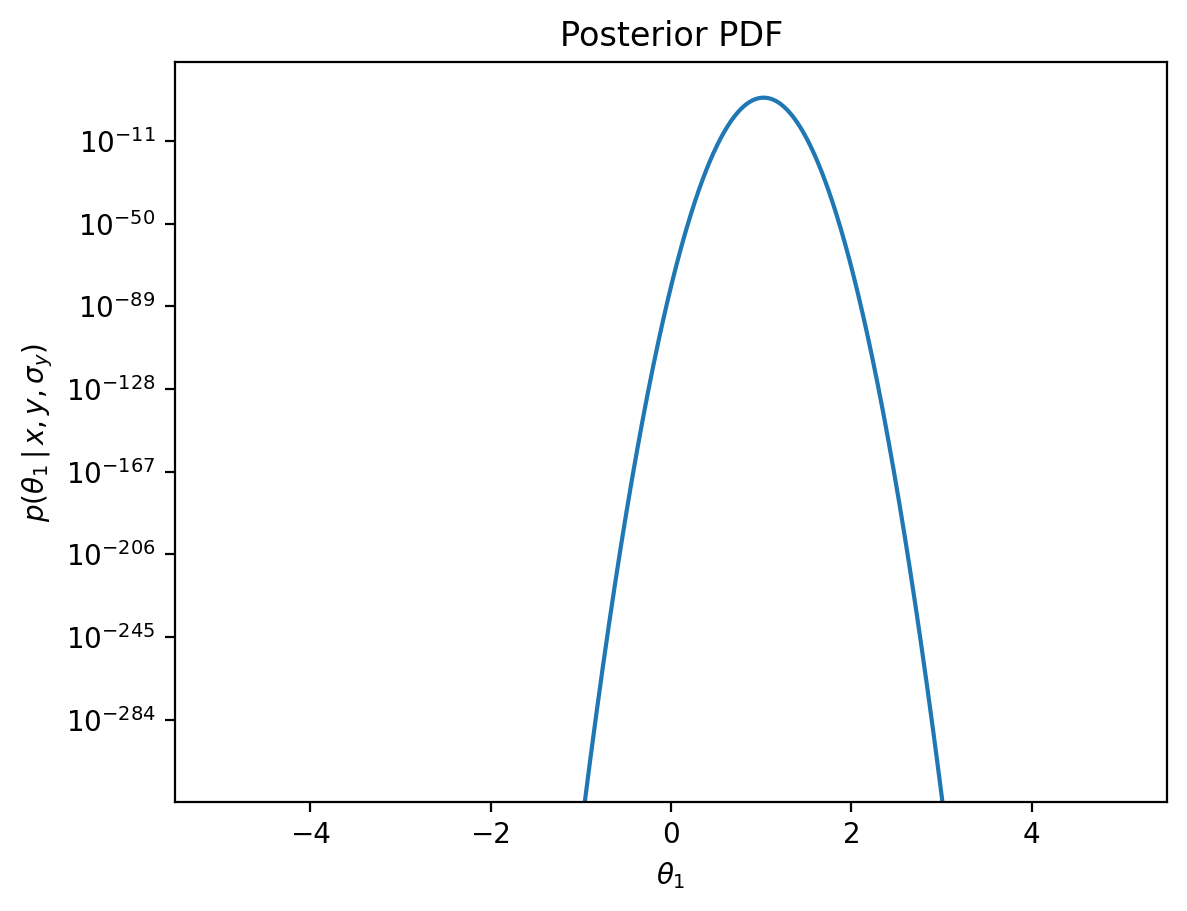

In [221]:
#2 

def prior1D(theta, loc=1, scale=1):
    return 1/scale
    
def Lvec(th1_arr, data, model=polynomial_fit):
    try:
        L_arr = np.zeros(len(th1_arr))
        for i, th1 in enumerate(th1_arr):
            theta = (th0, th1)
            L_arr[i] = L(theta, data, model)

    except:
        
        L_arr = L(th1_arr, data, model)
        
    return L_arr

def postvec(th1_arr):
    res = Lvec(th1_arr, data, model=polynomial_fit)  * (prior1D(th1_arr))
    return res

post_arr = postvec(th1_arr)

plt.plot(th1_arr, post_arr)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$p (\theta_1 \,|\, x, y, \sigma_y)$')
plt.yscale('log')
plt.title('Posterior PDF')
maxidx = np.argsort(post_arr)[-1]
th1_arr[maxidx]

60.206960396039605

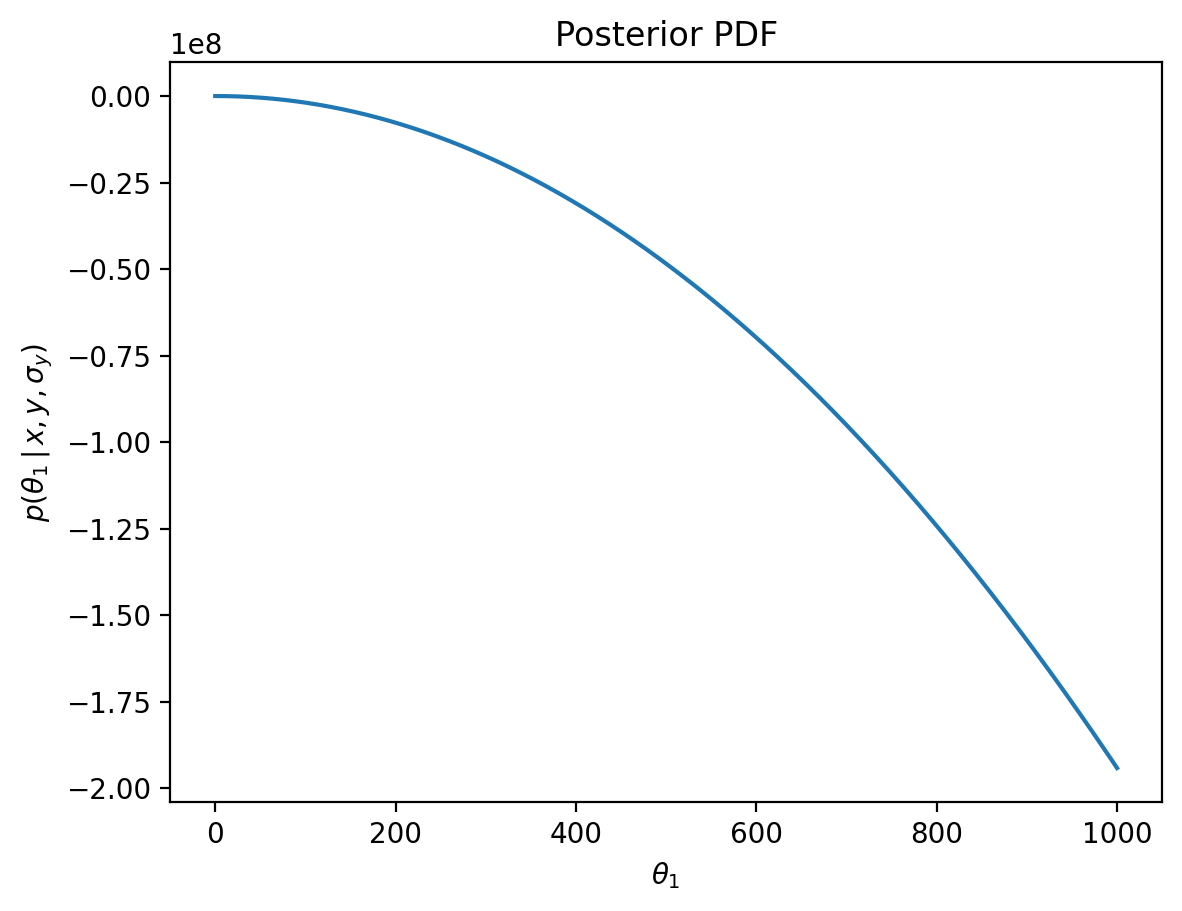

In [257]:
#2
def lnLvec(th1_arr, data, model=polynomial_fit):
    try:
        lnL_arr = np.zeros(len(th1_arr))
        for i, th1 in enumerate(th1_arr):
            theta = (th0, th1)
            lnL_arr[i] = logL(theta, data, model)

    except:
        
        lnL_arr = logL(th1_arr, data, model)
        
    return lnL_arr

def logpostvec(th1_arr):
    res = lnLvec(th1_arr, data, model=polynomial_fit)  + np.log((prior1D(th1_arr)))
    return res

th1_arr = np.linspace(1e-3,1e3,10**4)
logpost_arr = logpostvec(th1_arr)

plt.plot(th1_arr, logpost_arr)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$p (\theta_1 \,|\, x, y, \sigma_y)$')
# plt.yscale('log')
plt.title('Posterior PDF')
maxidx = np.argsort(post_arr)[-1]
th1_arr[maxidx]

In [250]:
#3
def intg(f, a, b, d=0.01, args=None):
    N = int((b-a)/d)
    xx = np.linspace(a, b, N)
    f_arr = f(xx)
    d = xx[1] - xx[0]

    res = (f_arr[0] + f_arr[-1])/2. + sum(f_arr[1:-1])*d

    return res

# x_arr = np.linspace(1e-5,1e5, 10**6)
# plt.loglog(x_arr, post2(x_arr))

%timeit
evidence = intg(postvec, -10**6, 10**6)
print(evidence)

KeyboardInterrupt: 